In [578]:
%matplotlib inline
import os
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt
import matplotlib
from scipy import interpolate

matplotlib.rcParams['figure.facecolor'] = 'white'

In [5]:
class Animal(object):
    def __repr__(self):
        return self.name
    
    def __init__(self, name, noise):
        self.name = name
        self.noise = noise
        
    def speak(self):
        print(self.noise)

In [6]:
my_animal = Animal('bob', 'hi')
your_animal = Animal('Woolhelmina', 'BAAA')

In [7]:
dir(my_animal)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'name',
 'noise',
 'speak']

In [8]:
print(my_animal)
print(your_animal)

bob
Woolhelmina


In [9]:
my_animal.__repr__()

'bob'

In [10]:
animallist = [my_animal, your_animal]
print(animallist)

for animal in animallist:
    animal.speak()

[bob, Woolhelmina]
hi
BAAA


-----------------------------------------------------------------

In [11]:
def formatstring(myfloat):
    return '%.5f'%myfloat

def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [583]:
class Planet():
    def __repr__(self):
        return self.name
    
    def __init__(
        self,
        name,
        mass, mass_unc,
        radius, radius_unc,
        datadir,
        mpList,
        fList,
        orbitalList,
        entropyList,
        **kwargs
    ):
        self.name = name
        self.mass = mass
        self.mass_unc = mass_unc
        self.radius = radius
        self.radius_unc = radius_unc
        self.datadir = datadir
        self.mpList = mpList
        self.fList = fList
        self.orbitalList = orbitalList
        self.entropyList = entropyList 
        
        if len(kwargs.keys()):
            print(kwargs)
        
        self.fnames = self.format_file_names()
        
        self.grid_masses, self.grid_radii, self.grid_fs, self.grid_ages, self.grid_luminosities = self.load_models(self.fnames)
        
        
    def format_file_names(self,formatter=None):
        if formatter is None:
            formatter = formatstring
        
        fnames = []
        for i, m in enumerate(self.mpList):
            ent = self.entropyList[i]
            
            for k, orbital in enumerate(self.orbitalList):
                for j, f in enumerate(self.fList):
                    fname = self.datadir + '/hist_evolve_%s_%s_0.24000_0.02000_%s_%s_0.10000.data'%(
                        formatter(m),
                        formatter(f),
                        formatter(orbital),
                        formatter(ent)
                    )
                    fnames.append(fname)
                    
        return fnames
    
    
    def load_models(self,fnames,loud=False):
        masses = []
        radii = []
        fs = []
        ages = []
        luminosities = []
        
        max_len = 0
        
        for i, fname in enumerate(fnames):
            ## TODO validate data from history file for
            ##  edge cases that seem to be broken...?
            h = mr.MesaData(fname,file_type='log')
            if loud:
                print(fname)
            
            masses.append(h.star_mass*mfrac)
            radii.append(h.radius*rfrac)
            fs.append(envelope_fraction(h))
            ages.append(h.star_age)
            luminosities.append(np.float64(h.luminosity))
       
            if type(h.star_age) == np.ndarray:
               j if len(h.star_age) > max_len:
                    max_len = len(h.star_age)
            else:
                if max_len < 1:
                    max_len = 1
                else:
                    pass
        
        arrays = [masses, radii, fs, ages, luminosities]
        square_arrays = [np.zeros((len(fnames),max_len))+np.nan for arr in arrays]
        for i, arr in enumerate(arrays):
            for j, model_arr in enumerate(arr):
                if type(model_arr) == np.ndarray:
                    this_len = len(model_arr)
                    square_arrays[i][j,:this_len] = model_arr
                else:
                    this_len = 1
                    square_arrays[i][j] = model_arr
        
        return square_arrays
    

In [428]:
k2146b = Planet('K2-146b',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=np.arange(5.1, 6.6+0.1, 0.1), 
                fList=np.arange(0.004,0.02+0.001,0.001),
                orbitalList=[0.02584],
                entropyList=[7.20, 7.21, 7.21, 7.22, 7.22, 7.22, 7.23, 7.23, 
                             7.24, 7.24, 7.24, 7.25, 7.25, 7.26, 7.26, 7.26]
               )

#k2146c = Planet('K2-146c',7.50, 0.23, 2.19, 0.07)

In [18]:
print(k2146b.grid_masses)

[[5.09999999 5.09999727 5.09999434 ...        nan        nan        nan]
 [5.09999999 5.0999967  5.09999323 ...        nan        nan        nan]
 [5.09999999 5.09999674 5.09999328 ...        nan        nan        nan]
 ...
 [6.6        6.59999721 6.59999386 ...        nan        nan        nan]
 [6.6        6.59999542 6.59998992 ...        nan        nan        nan]
 [6.6        6.59999707 6.59999356 ...        nan        nan        nan]]


In [19]:
arr = np.arange(100).reshape(-1,25)
print(arr)
print('----')
print(arr[[0,1,2,3],[-1,-2,-2,-1]])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24]
 [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
  49]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
  74]
 [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
  99]]
----
[24 48 73 99]


In [20]:
final_indices = np.argmax(np.isnan(k2146b.grid_ages),axis=-1) - 1
#np.argmax(k2146b.grid_masses,axis=-1) - np.argmin(k2146b.grid_masses,axis=-1)
#print(np.argmax(k2146b.grid_ages,axis=-1))
#print(k2146b.grid_masses.shape)

final_masses = k2146b.grid_masses[np.arange(k2146b.grid_masses.shape[0]), final_indices]
#print(final_masses)
#final_ages = k2146b.grid_ages[np.arange(k2146b.grid_ages.shape[0]),final_indices]
#print(final_ages)

9820815002.459877


(6000000000.0, 10000000000.0)

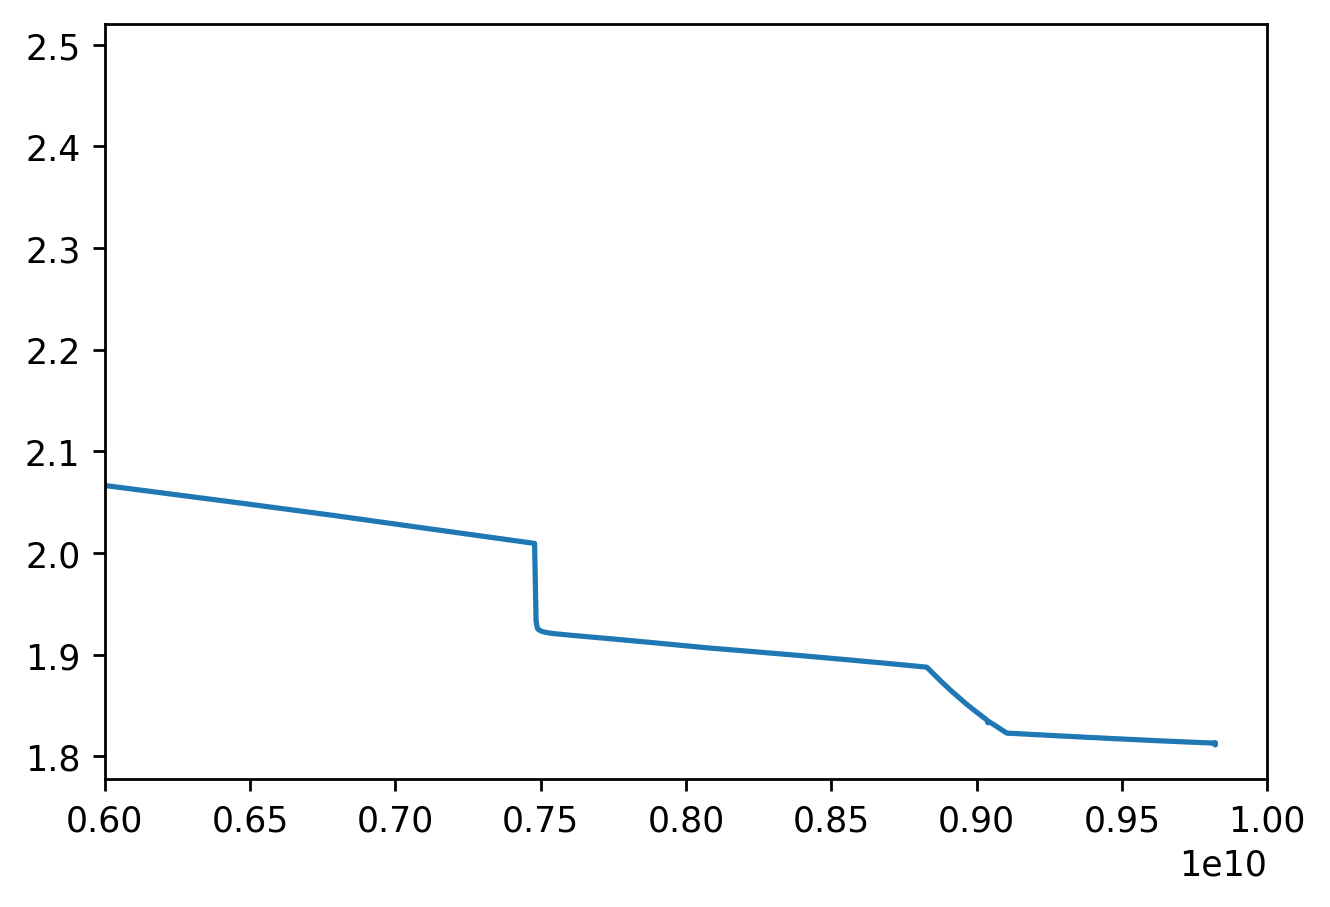

In [21]:
#print(list(k2146b.grid_ages[6]))
#print(np.argmax(k2146b.grid_ages[6]))

plt.plot(k2146b.grid_ages[6,:],k2146b.grid_radii[6,:])
#plt.gca().axhline(0,ls='--',c='r')
plt.gcf().set_dpi(250)
print(k2146b.grid_ages[6,1562])
plt.gca().set_xlim(6e9,1e10)

In [22]:
radius_age_interp = interpolate.interp1d(k2146b.grid_ages[0],k2146b.grid_radii[0],kind='linear')
print(radius_age_interp(3.0e9))

1.9369792217745028


/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


Text(0.5, 1.0, 'All models, before jumps')

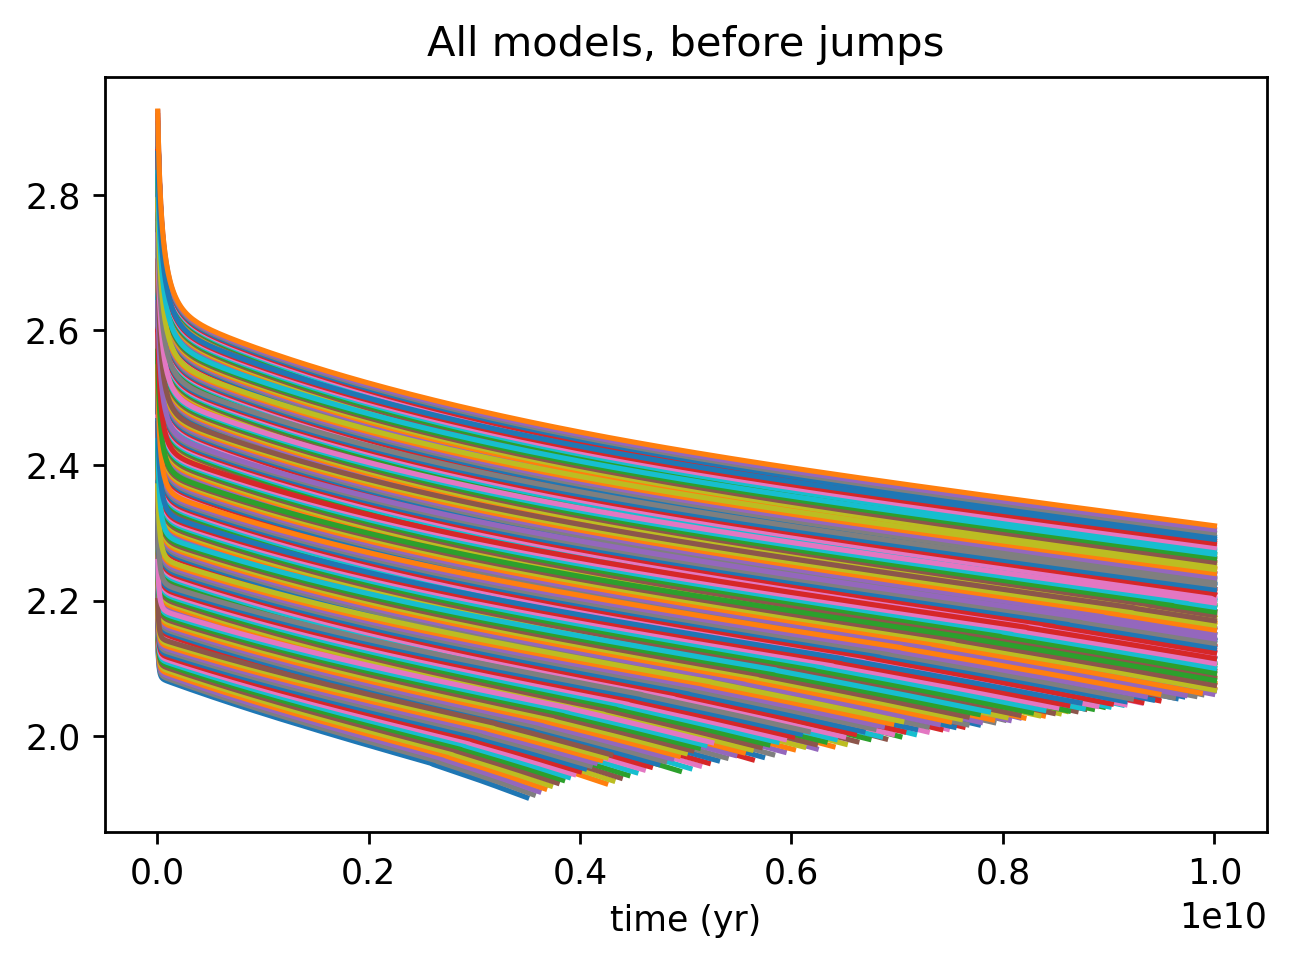

In [25]:
count = 0
for i in range(k2146b.grid_ages.shape[0]):
    foo = k2146b.grid_ages[i,:]
    dts = foo[1:]-foo[:-1]
    drs = k2146b.grid_radii[i,1:] - k2146b.grid_radii[i,:-1]
    
    if determine_if_model_bad(k2146b, i):
        bad_index = determine_where_model_turns_bad(k2146b,i)
    else:
        bad_index = drs.size


    plt.plot(k2146b.grid_ages[i,1:bad_index], k2146b.grid_radii[i,1:bad_index])
    #plt.plot(k2146b.grid_ages[i,1:], drs)
        
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('time (yr)')
#plt.gca().set_ylabel('planet radius (Earth radii)')
plt.gca().set_title('All models, before jumps')
#plt.gca().set_ylim(-0.1,0.02)

/Users/bridgethaas/miniconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


Text(0.5, 1.0, "Models that don't go back in time")

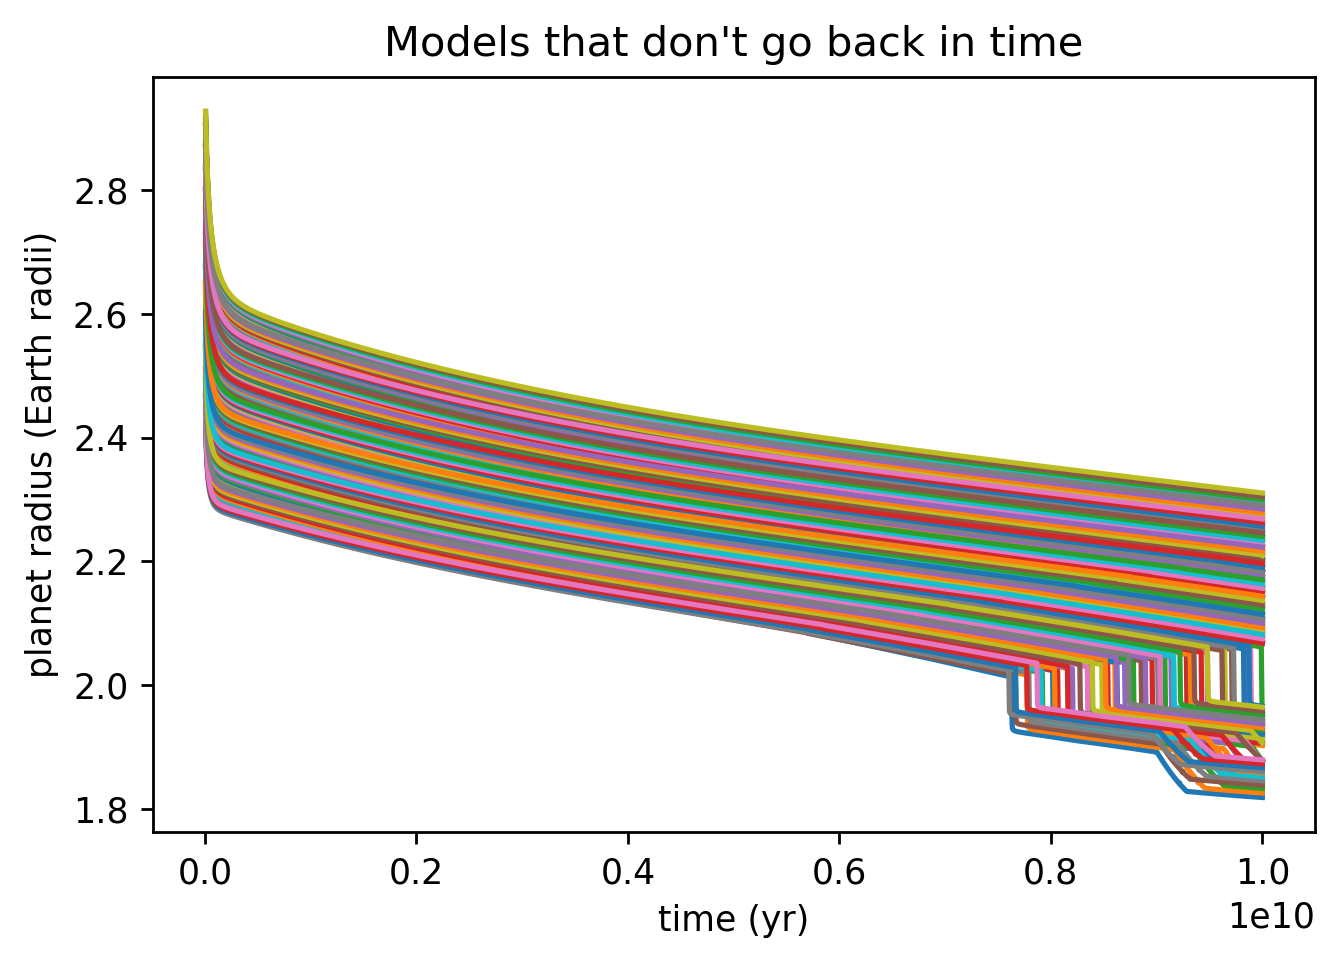

In [26]:
count = 0
for i in range(k2146b.grid_ages.shape[0]):
    foo = k2146b.grid_ages[i,:]
    dts = foo[1:]-foo[:-1]
    if not np.any(dts<0):
        count+=1
        plt.plot(k2146b.grid_ages[i,:], k2146b.grid_radii[i,:])
        #plt.plot(k2146b.grid_ages[i,1:], dts)
        
plt.gcf().set_dpi(250)
plt.gca().set_xlabel('time (yr)')
plt.gca().set_ylabel('planet radius (Earth radii)')
plt.gca().set_title('Models that don\'t go back in time')

In [27]:
def determine_if_model_bad(planet, model_index,dr_thresh=0.02):
    dts = planet.grid_ages[i,1:] - planet.grid_ages[i,:-1]
    drs = planet.grid_radii[i,1:] - planet.grid_radii[i,:-1]
    
    #np.any(dts<0) or 
    return np.any(np.abs(drs)>0.02)


def determine_where_model_turns_bad(planet, model_index,dr_thresh=0.02):
    dts = planet.grid_ages[i,1:] - planet.grid_ages[i,:-1]
    drs = planet.grid_radii[i,1:] - planet.grid_radii[i,:-1]
    
    #np.any(dts<0) or 
    ids = np.argwhere(np.abs(drs)>0.02)
    return ids.flatten()[0]

not (a and b) -> not a or not b -> either doesnt go back in time or it does and radius only changes a little bit (or both)

In [619]:
class EarlyPlanet(Planet):
    
    def __init__(        
            self,
            name,
            mass, mass_unc,
            radius, radius_unc,
            datadir,
            mpList,
            fList,
            orbitalList,
            entropyList,
            stage,
            **kwargs
        ):
        
        self.name = name
        self.mass = mass
        self.mass_unc = mass_unc
        self.radius = radius
        self.radius_unc = radius_unc
        self.datadir = datadir
        self.mpList = mpList
        self.fList = fList
        self.orbitalList = orbitalList
        self.entropyList = entropyList 
        self.stage = stage
        
        if len(kwargs.keys()):
            print(kwargs)
        
        self.fnames = self.format_file_names()
        
        self.grid_masses, self.grid_radii, self.grid_fs, self.grid_ages, self.grid_luminosities = self.load_models(self.fnames)
        print(self.grid_masses, self.grid_radii, self.grid_fs, self.grid_ages, self.grid_luminosities)
        
    
    def __repr__(self):
        return self.name
    
    def format_file_names(self, formatter=None):
        if formatter is None:
            formatter = formatstring
            
        fnames = []
        
        if self.stage == 'pre_reduce':
            for i, m in enumerate(self.mpList):
                fname = self.datadir + '/hist_pre_reduce_%s.data'%(formatter(m))
                fnames.append(fname)
                
        elif self.stage == 'pre_core':
            for i, m in enumerate(self.mpList):
                for j, f in enumerate(self.fList):
                    fname = self.datadir + '/hist_pre_core_%s_%s.data'%(
                        formatter(m),
                        formatter(f)
                    )
                    fnames.append(fname)
        
        elif self.stage == 'comp' or self.stage == 'corel' or self.stage == 'reduce' or self.stage == 'corem':
            for i, m in enumerate(self.mpList):
                for j, f in enumerate(self.fList):
                    fname = self.datadir + '/hist_' + str(self.stage) + '_%s_%s_0.24000_0.02000.data'%(
                        formatter(m),
                        formatter(f)
                    )
                    fnames.append(fname)
                    
        elif (self.stage == 'heating' or self.stage == 'remove_heating' or 
              self.stage == 'cooling' or self.stage == 'remove_cooling'):
            for i, m in enumerate(self.mpList):
                ent = self.entropyList[i]
                
                for j, f in enumerate(self.fList):
                    fname = self.datadir + '/hist_' + str(self.stage) + '_%s_%s_0.24000_0.02000_%s.data'%(
                        formatter(m),
                        formatter(f),
                        formatter(ent)
                    )
                    fnames.append(fname)
                    
        elif self.stage == 'irrad':
            for i, m in enumerate(self.mpList):
                ent = self.entropyList[i]
            
                for k, orbital in enumerate(self.orbitalList):
                    for j, f in enumerate(self.fList):
                        fname = self.datadir + '/hist_' + str(self.stage) + '_%s_%s_0.24000_0.02000_%s_%s.data'%(
                            formatter(m),
                            formatter(f),
                            formatter(orbital),
                            formatter(ent)
                        )
                        fnames.append(fname)
                    
        else:
            print(str(self.stage) + ' is not a valid stage')
                    
        return fnames
    

In [430]:
b_pre = EarlyPlanet('K2-146b',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=np.arange(5.1, 6.6+0.1, 0.1), 
                fList=np.arange(0.004,0.02+0.001,0.001),
                orbitalList=[0.02584],
                entropyList=[7.20, 7.21, 7.21, 7.22, 7.22, 7.22, 7.23, 7.23, 
                             7.24, 7.24, 7.24, 7.25, 7.25, 7.26, 7.26, 7.26],
                stage='irrad'

)

In [431]:
b_pre.grid_masses

array([[5.09999999, 5.09999999, 5.09999999, ..., 5.09999999, 5.09999999,
        5.09999999],
       [5.09999999, 5.09999999, 5.09999999, ..., 5.09999999, 5.09999999,
        5.09999999],
       [5.09999999, 5.09999999, 5.09999999, ..., 5.09999999, 5.09999999,
        5.09999999],
       ...,
       [6.6       , 6.6       , 6.6       , ...,        nan,        nan,
               nan],
       [6.6       , 6.6       , 6.6       , ...,        nan,        nan,
               nan],
       [6.6       , 6.6       , 6.6       , ...,        nan,        nan,
               nan]])

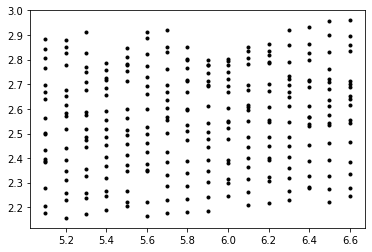

In [130]:
plt.plot(b_pre.grid_masses[:,0], b_pre.grid_radii[:,0], 'k.')
plt.show()

-------------------------------------------------------

In [432]:
pre_reduce = EarlyPlanet('pre_reduce',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='pre_reduce'

)

In [433]:
pre_core = EarlyPlanet('pre_core',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='pre_core'

)

In [434]:
comp = EarlyPlanet('comp',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='comp'

)

In [435]:
corel = EarlyPlanet('corel',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='corel'

)

In [436]:
reduce = EarlyPlanet('reduce',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='reduce'

)

In [437]:
corem = EarlyPlanet('corem',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='corem'

)

In [438]:
heating = EarlyPlanet('heating',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='heating'

)

In [439]:
remove_heating = EarlyPlanet('remove_heating',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='remove_heating'

)

In [440]:
irrad = EarlyPlanet('irrad',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22],
                stage='irrad'

)

In [441]:
evolve = Planet('evolve',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/old/146b_fine',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.02584],
                entropyList=[7.22]

)

Text(0.05, 0.85, 'M = 5.5 $M_{\\oplus}$, f = 1% \nMESA 10398')

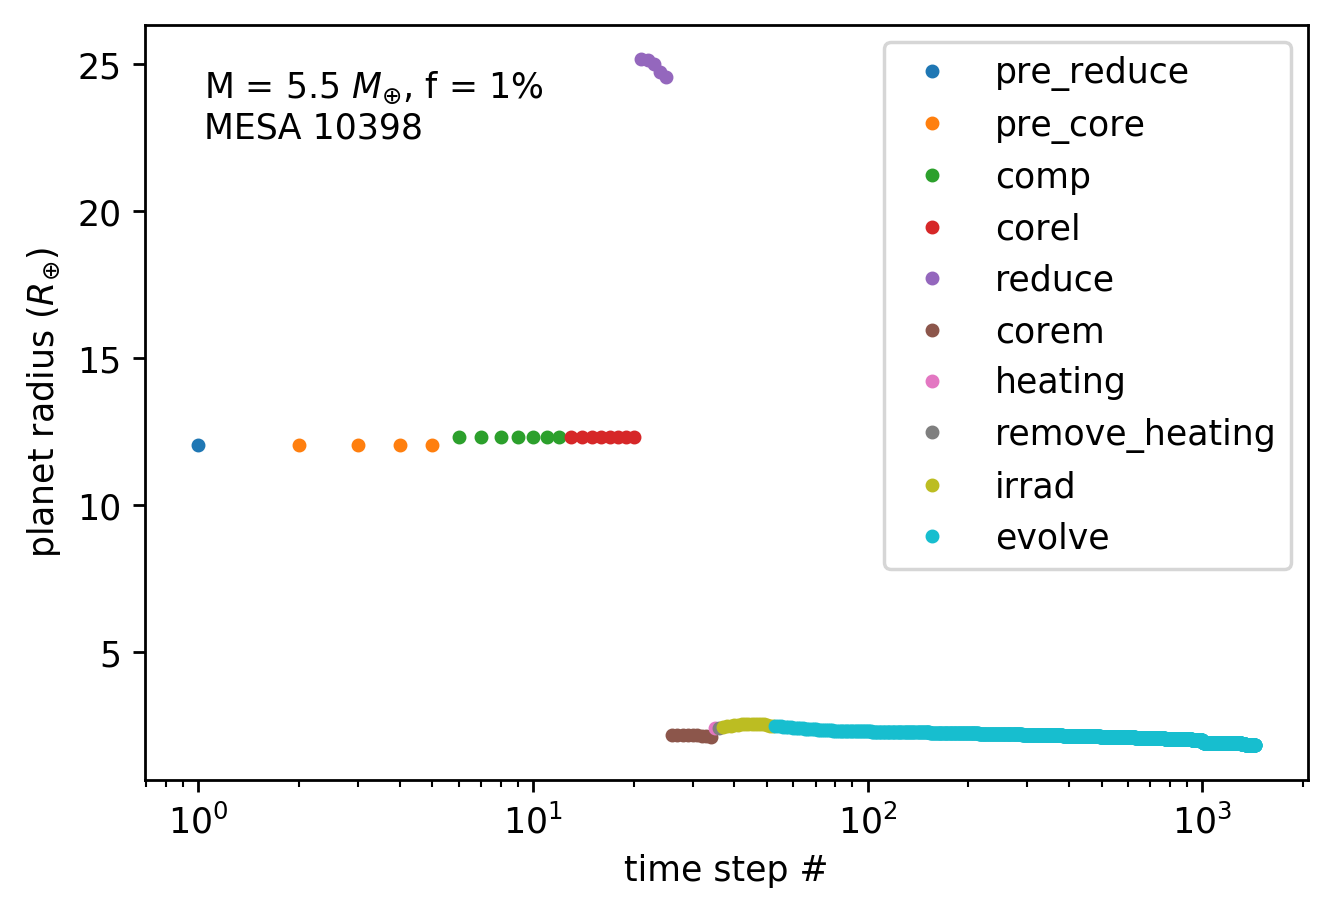

In [442]:
fig1 = plt.figure()
ax1 = plt.gca()
fig1.set_dpi(250)

xs = np.arange(len(pre_reduce.grid_radii[0])) + 1
ax1.plot(xs,pre_reduce.grid_radii[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,pre_core.grid_radii[0],'.',label='pre_core')
xs = np.arange(len(comp.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,comp.grid_radii[0],'.',label='comp')
xs = np.arange(len(corel.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,corel.grid_radii[0],'.',label='corel')
xs = np.arange(len(reduce.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,reduce.grid_radii[0],'.',label='reduce')
xs = np.arange(len(corem.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,corem.grid_radii[0],'.',label='corem')
xs = np.arange(len(heating.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,heating.grid_radii[0],'.',label='heating')
xs = np.arange(len(remove_heating.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,remove_heating.grid_radii[0],'.',label='remove_heating')
xs = np.arange(len(irrad.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,irrad.grid_radii[0],'.',label='irrad')
#xs = xs[-1] + 1
#ax1.plot(xs,evolve.grid_radii[0][0],'.',label='evolve')
xs = np.arange(len(evolve.grid_radii[0])) + xs[-1] + 1
ax1.plot(xs,evolve.grid_radii[0],'.',label='evolve')

ax1.set_xlabel('time step #')
ax1.set_ylabel('planet radius ($R_{\oplus}$)')

ax1.set_xscale('log')

ax1.legend(loc=0)

ax1.text(0.05, 0.85, 'M = 5.5 $M_{\oplus}$, f = 1% \nMESA 10398', transform=ax1.transAxes)

In [443]:
comp.grid_radii

array([[12.31871807, 12.31870203, 12.31866211, 12.31856282, 12.31831582,
        12.31788723, 12.31785902]])

In [444]:
pre_reduce1 = EarlyPlanet('pre_reduce1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='pre_reduce'

)

In [445]:
pre_core1 = EarlyPlanet('pre_core1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='pre_core'

)

In [446]:
comp1 = EarlyPlanet('comp1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='comp'

)

In [447]:
corel1 = EarlyPlanet('corel1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='corel'

)

In [448]:
reduce1 = EarlyPlanet('reduce1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='reduce'

)

In [449]:
corem1 = EarlyPlanet('corem1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='corem'

)

In [450]:
heating1 = EarlyPlanet('heating1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='heating'

)

In [451]:
remove_heating1 = EarlyPlanet('remove_heating1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='remove_heating'

)

In [452]:
irrad1 = EarlyPlanet('irrad1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22],
                stage='irrad'

)

In [453]:
evolve1 = Planet('evolve1',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.5], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.22]

)

Text(0.05, 0.85, 'M = 5.5 $M_{\\oplus}$, f = 1% \nMESA 12778')

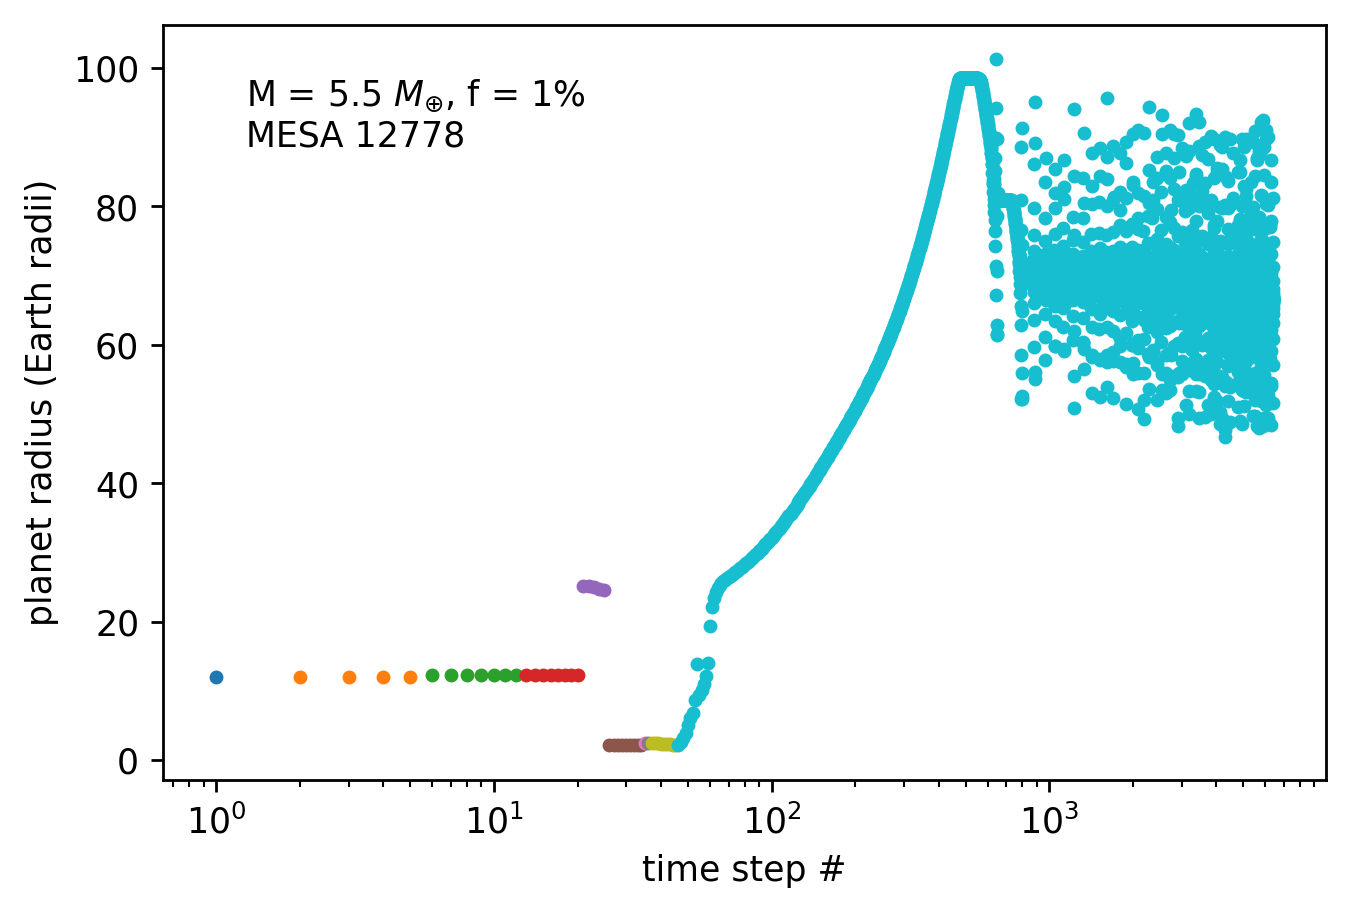

In [454]:
fig3 = plt.figure()
ax3 = plt.gca()
fig3.set_dpi(250)

xs = np.arange(len(pre_reduce1.grid_radii[0])) + 1
ax3.plot(xs,pre_reduce1.grid_radii[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,pre_core1.grid_radii[0],'.',label='pre_core')
xs = np.arange(len(comp1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,comp1.grid_radii[0],'.',label='comp')
xs = np.arange(len(corel1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,corel1.grid_radii[0],'.',label='corel')
xs = np.arange(len(reduce1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,reduce1.grid_radii[0],'.',label='reduce')
xs = np.arange(len(corem1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,corem1.grid_radii[0],'.',label='corem')
xs = np.arange(len(heating1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,heating1.grid_radii[0],'.',label='heating')
xs = np.arange(len(remove_heating1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,remove_heating1.grid_radii[0],'.',label='remove_heating')
xs = np.arange(len(irrad1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,irrad1.grid_radii[0],'.',label='irrad')
xs = xs = np.arange(len(evolve1.grid_radii[0])) + xs[-1] + 1
ax3.plot(xs,evolve1.grid_radii[0],'.',label='evolve')

ax3.set_xlabel('time step #')
ax3.set_ylabel('planet radius (Earth radii)')

#ax3.set_xlim(0,500)
ax3.set_xscale('log')

ax3.text(0.05, 0.85, 'M = 5.5 $M_{\oplus}$, f = 1% \nMESA 12778', transform=ax1.transAxes)

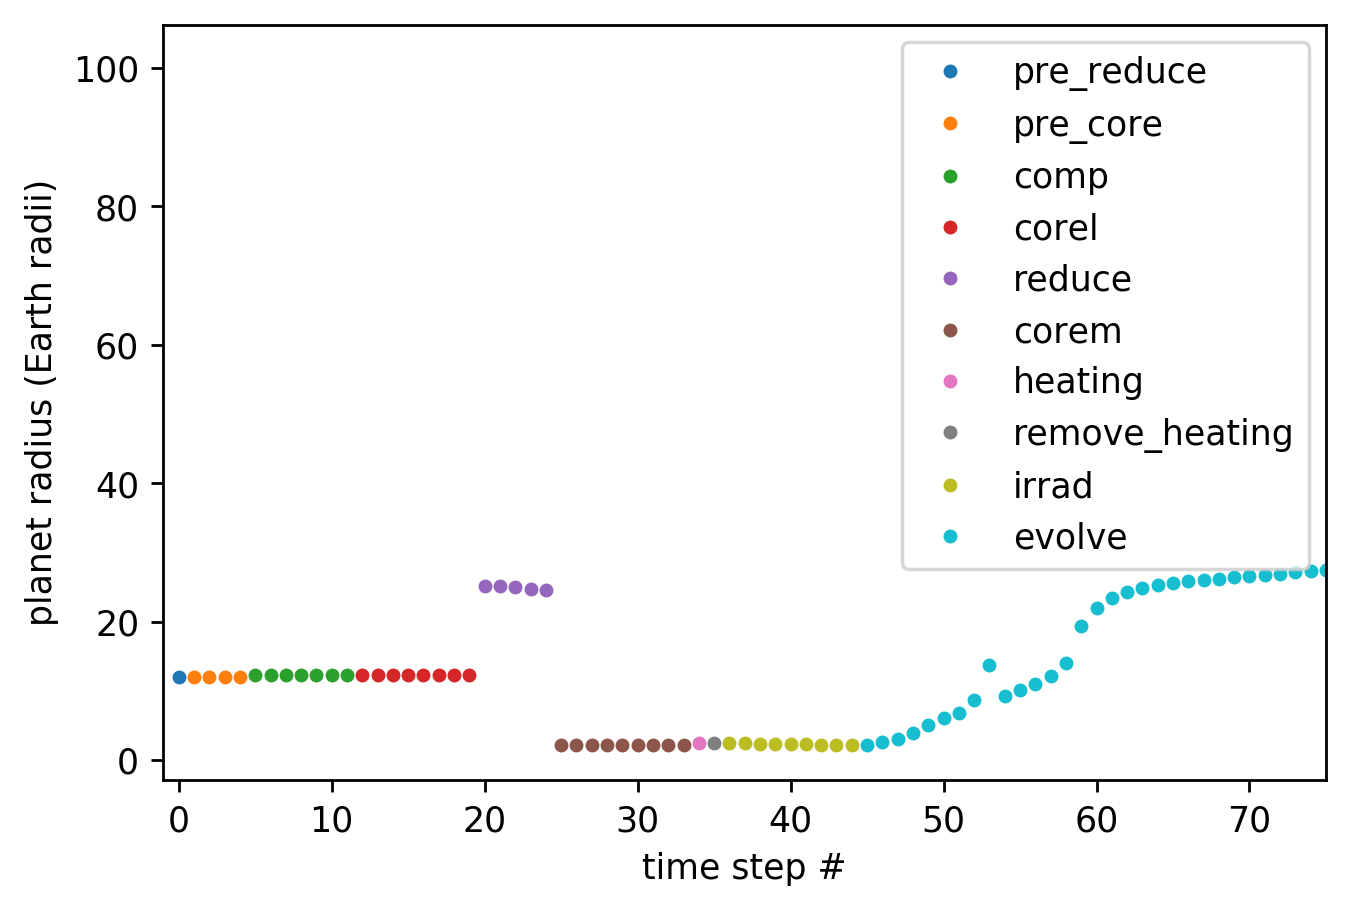

In [455]:
fig2 = plt.figure()
ax2 = plt.gca()
fig2.set_dpi(250)

xs = np.arange(len(pre_reduce1.grid_radii[0]))
ax2.plot(xs,pre_reduce1.grid_radii[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,pre_core1.grid_radii[0],'.',label='pre_core')
xs = np.arange(len(comp1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,comp1.grid_radii[0],'.',label='comp')
xs = np.arange(len(corel1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,corel1.grid_radii[0],'.',label='corel')
xs = np.arange(len(reduce1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,reduce1.grid_radii[0],'.',label='reduce')
xs = np.arange(len(corem1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,corem1.grid_radii[0],'.',label='corem')
xs = np.arange(len(heating1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,heating1.grid_radii[0],'.',label='heating')
xs = np.arange(len(remove_heating1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,remove_heating1.grid_radii[0],'.',label='remove_heating')
xs = np.arange(len(irrad1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,irrad1.grid_radii[0],'.',label='irrad')
xs = xs = np.arange(len(evolve1.grid_radii[0])) + xs[-1] + 1
ax2.plot(xs,evolve1.grid_radii[0],'.',label='evolve')

ax2.set_xlabel('time step #')
ax2.set_ylabel('planet radius (Earth radii)')

ax2.set_xlim(-1,75)

ax2.legend(loc=0)

In [ ]:
fig4 = plt.figure()
ax4 = plt.gca()
fig4.set_dpi(250)

xs = np.arange(len(pre_reduce.grid_luminosities[0])) + 1
ax4.plot(xs,pre_reduce.grid_luminosities[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,pre_core.grid_luminosities[0],'.',label='pre_core')
xs = np.arange(len(comp.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,comp.grid_luminosities[0],'.',label='comp')
xs = np.arange(len(corel.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,corel.grid_luminosities[0],'.',label='corel')
xs = np.arange(len(reduce.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,reduce.grid_luminosities[0],'.',label='reduce')
xs = np.arange(len(corem.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,corem.grid_luminosities[0],'.',label='corem')
xs = np.arange(len(heating.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,heating.grid_luminosities[0],'.',label='heating')
xs = np.arange(len(remove_heating.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,remove_heating.grid_luminosities[0],'.',label='remove_heating')
xs = np.arange(len(irrad.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,irrad.grid_luminosities[0],'.',label='irrad')
#xs = xs[-1] + 1
#ax4.plot(xs,evolve.grid_luminosities[0][0],'.',label='evolve')
xs = np.arange(len(evolve.grid_luminosities[0])) + xs[-1] + 1
ax4.plot(xs,evolve.grid_luminosities[0],'.',label='evolve')

ax4.set_xlabel('time step #')
#ax4.set_ylabel('planet radius (Earth luminosities)')

ax4.set_xscale('log')

ax4.legend(loc=0)

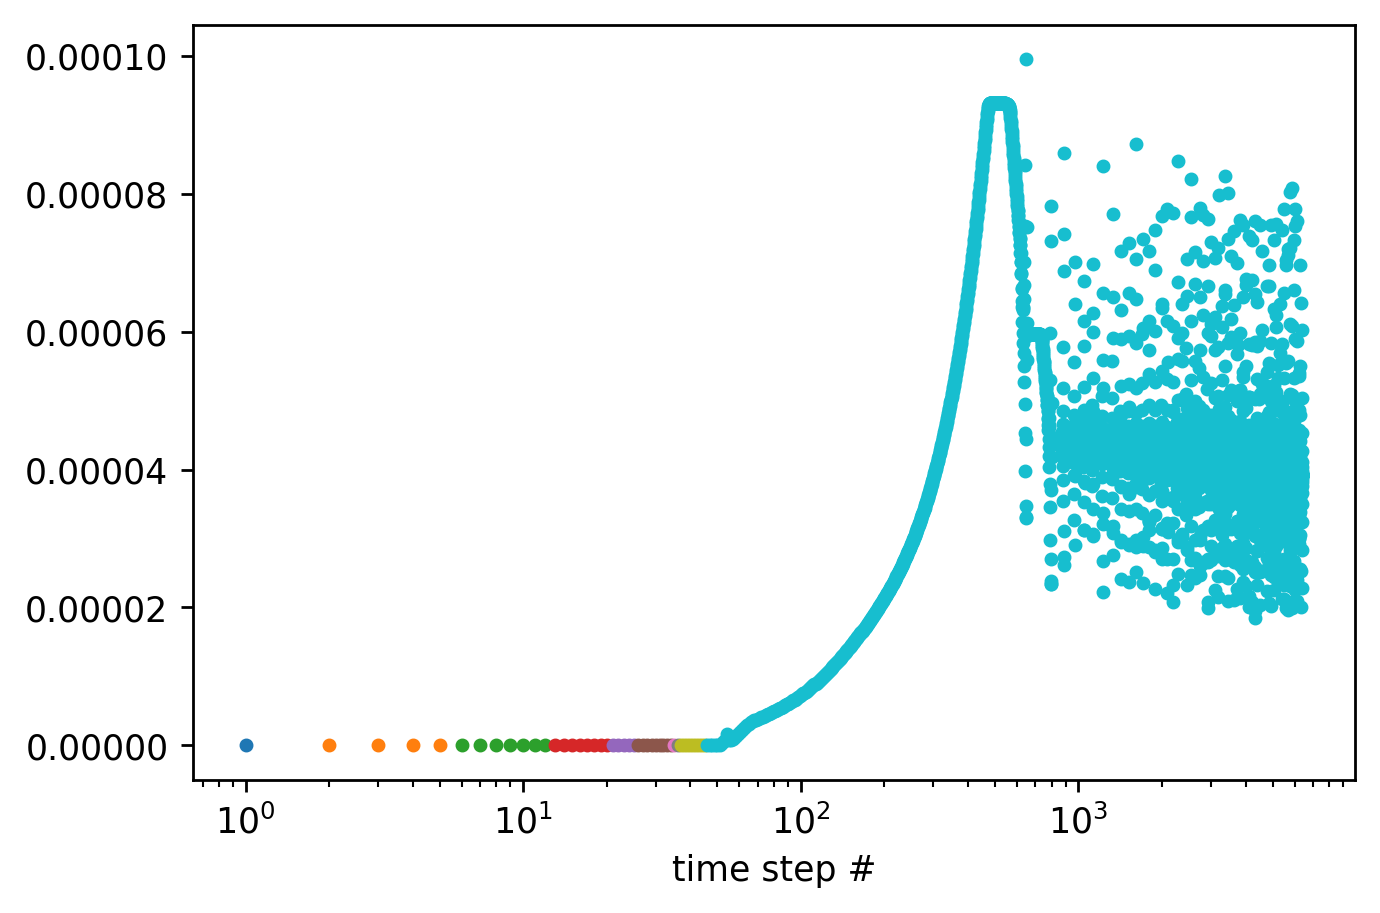

In [457]:
fig5 = plt.figure()
ax5 = plt.gca()
fig5.set_dpi(250)

xs = np.arange(len(pre_reduce1.grid_luminosities[0])) + 1
ax5.plot(xs,pre_reduce.grid_luminosities[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,pre_core.grid_luminosities[0],'.',label='pre_core')
xs = np.arange(len(comp1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,comp1.grid_luminosities[0],'.',label='comp')
xs = np.arange(len(corel1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,corel1.grid_luminosities[0],'.',label='corel')
xs = np.arange(len(reduce1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,reduce1.grid_luminosities[0],'.',label='reduce')
xs = np.arange(len(corem1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,corem1.grid_luminosities[0],'.',label='corem')
xs = np.arange(len(heating1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,heating1.grid_luminosities[0],'.',label='heating')
xs = np.arange(len(remove_heating1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,remove_heating1.grid_luminosities[0],'.',label='remove_heating')
xs = np.arange(len(irrad1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,irrad1.grid_luminosities[0],'.',label='irrad')
xs = xs = np.arange(len(evolve1.grid_luminosities[0])) + xs[-1] + 1
ax5.plot(xs,evolve1.grid_luminosities[0],'.',label='evolve')

ax5.set_xlabel('time step #')
#ax5.set_ylabel('planet radius (Earth luminosities)')

#ax5.set_xlim(0,500)
ax5.set_xscale('log')

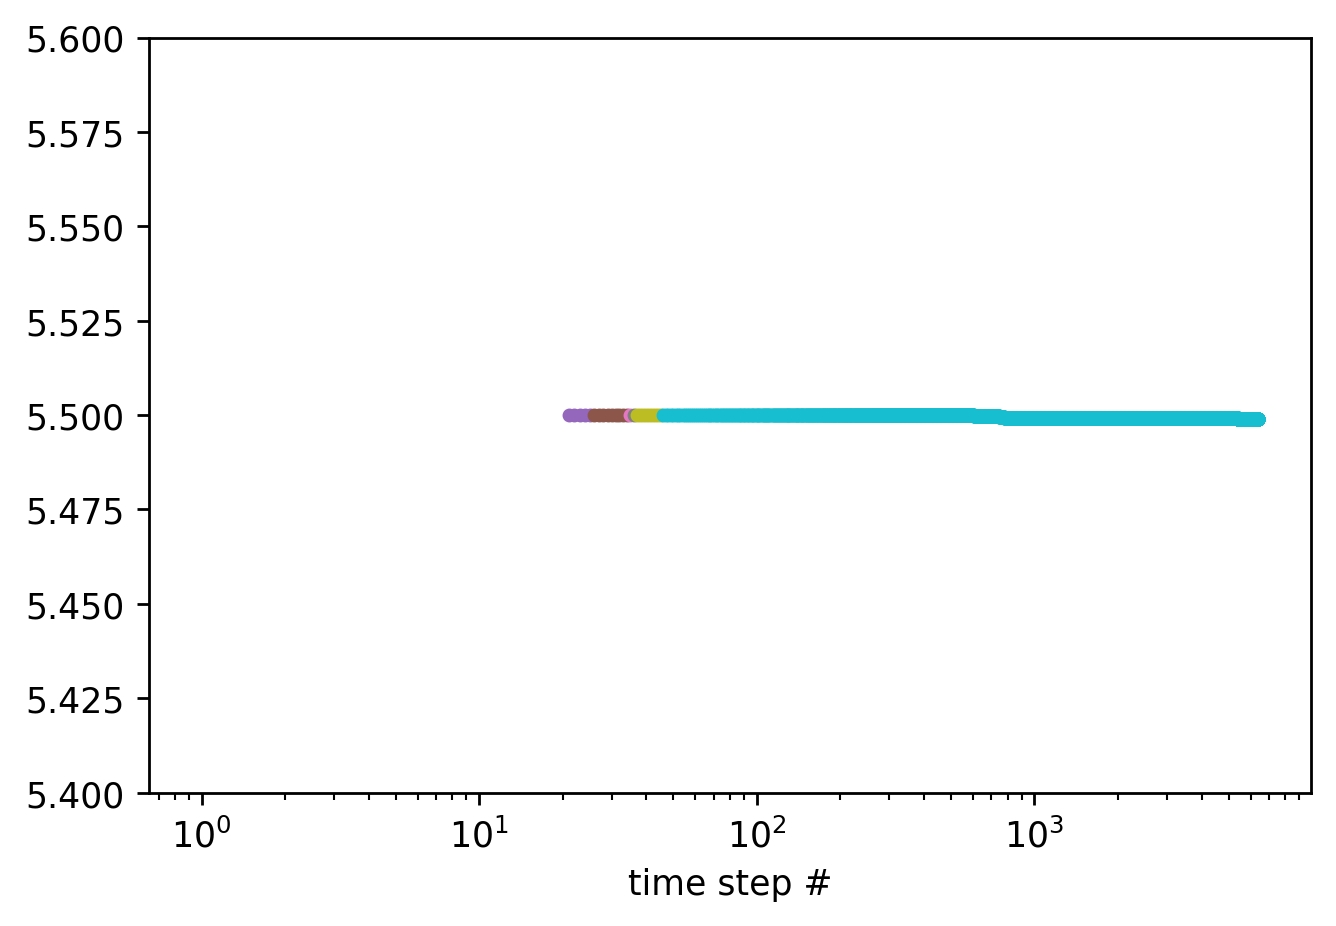

In [458]:
fig6 = plt.figure()
ax6 = plt.gca()
fig6.set_dpi(250)

xs = np.arange(len(pre_reduce1.grid_masses[0])) + 1
ax6.plot(xs,pre_reduce.grid_masses[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,pre_core.grid_masses[0],'.',label='pre_core')
xs = np.arange(len(comp1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,comp1.grid_masses[0],'.',label='comp')
xs = np.arange(len(corel1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,corel1.grid_masses[0],'.',label='corel')
xs = np.arange(len(reduce1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,reduce1.grid_masses[0],'.',label='reduce')
xs = np.arange(len(corem1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,corem1.grid_masses[0],'.',label='corem')
xs = np.arange(len(heating1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,heating1.grid_masses[0],'.',label='heating')
xs = np.arange(len(remove_heating1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,remove_heating1.grid_masses[0],'.',label='remove_heating')
xs = np.arange(len(irrad1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,irrad1.grid_masses[0],'.',label='irrad')
xs = xs = np.arange(len(evolve1.grid_masses[0])) + xs[-1] + 1
ax6.plot(xs,evolve1.grid_masses[0],'.',label='evolve')

ax6.set_xlabel('time step #')
#ax6.set_ylabel('planet radius (Earth masses)')

ax6.set_ylim(5.4,5.6)
ax6.set_xscale('log')

In [513]:
pre_reduce2 = EarlyPlanet('pre_reduce2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='pre_reduce'

)

In [460]:
pre_core2 = EarlyPlanet('pre_core2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='pre_core'

)

In [461]:
comp2 = EarlyPlanet('comp2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='comp'

)

In [462]:
corel2 = EarlyPlanet('corel2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='corel'

)

In [463]:
reduce2 = EarlyPlanet('reduce2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='reduce'

)

In [464]:
corem2 = EarlyPlanet('corem2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='corem'

)

In [465]:
heating2 = EarlyPlanet('heating2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='heating'

)

In [466]:
remove_heating2 = EarlyPlanet('remove_heating2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='remove_heating'

)

In [467]:
irrad2 = EarlyPlanet('irrad2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20],
                stage='irrad'

)

In [468]:
evolve2 = Planet('evolve2',
                5.77, 0.18, 
                2.04, 0.006, 
                'data/146b',
                mpList=[5.1], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.20]
)

Text(0.05, 0.85, 'M = 5.1 $M_{\\oplus}$, f = 1% \nMESA 12778')

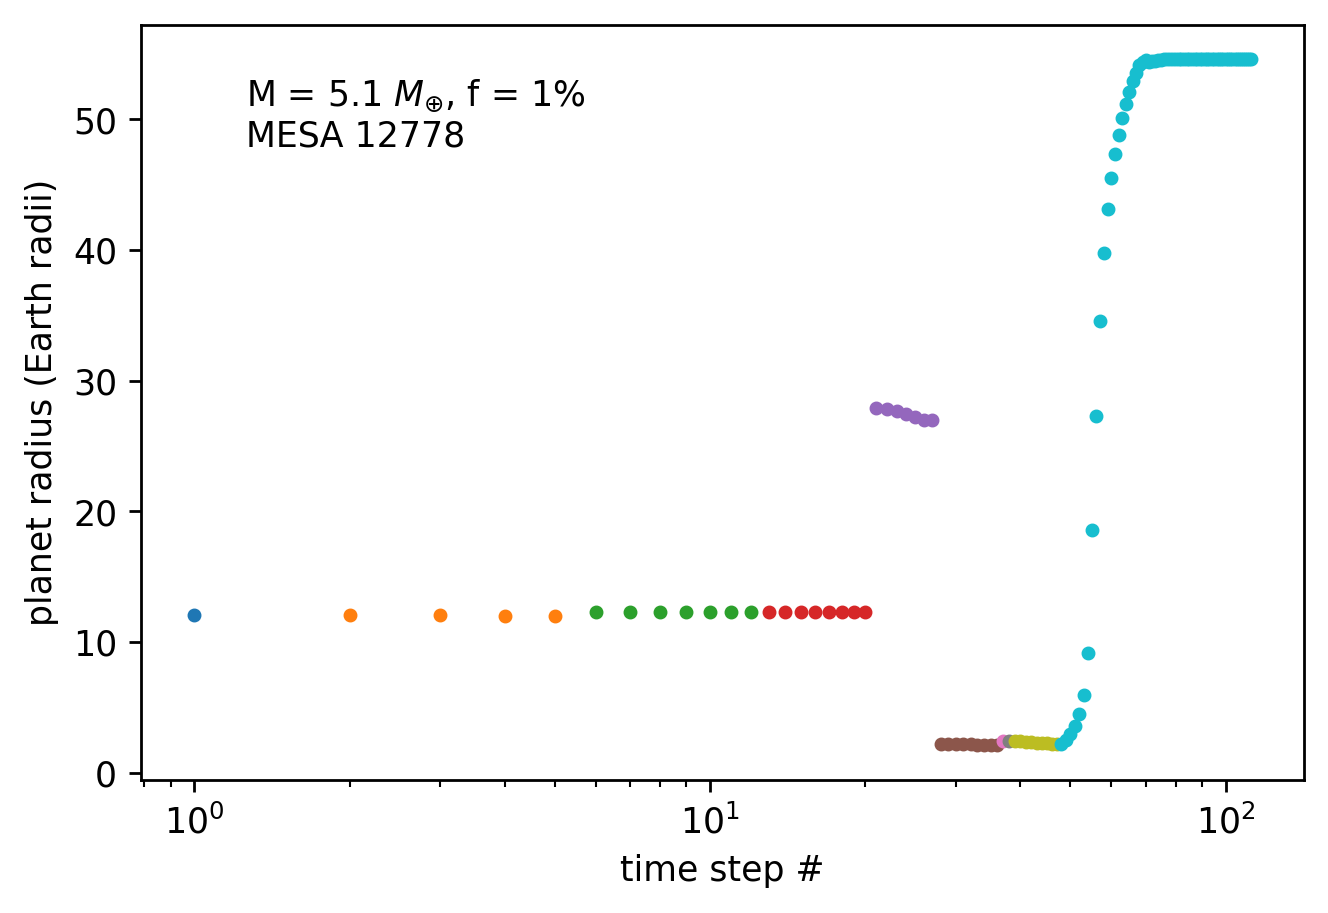

In [469]:
fig7 = plt.figure()
ax7 = plt.gca()
fig7.set_dpi(250)

xs = np.arange(len(pre_reduce2.grid_radii[0])) + 1
ax7.plot(xs,pre_reduce2.grid_radii[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,pre_core2.grid_radii[0],'.',label='pre_core')
xs = np.arange(len(comp2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,comp2.grid_radii[0],'.',label='comp')
xs = np.arange(len(corel2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,corel2.grid_radii[0],'.',label='corel')
xs = np.arange(len(reduce2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,reduce2.grid_radii[0],'.',label='reduce')
xs = np.arange(len(corem2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,corem2.grid_radii[0],'.',label='corem')
xs = np.arange(len(heating2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,heating2.grid_radii[0],'.',label='heating')
xs = np.arange(len(remove_heating2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,remove_heating2.grid_radii[0],'.',label='remove_heating')
xs = np.arange(len(irrad2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,irrad2.grid_radii[0],'.',label='irrad')
xs = xs = np.arange(len(evolve2.grid_radii[0])) + xs[-1] + 1
ax7.plot(xs,evolve2.grid_radii[0],'.',label='evolve')

ax7.set_xlabel('time step #')
ax7.set_ylabel('planet radius (Earth radii)')

#ax7.set_xlim(0,500)
ax7.set_xscale('log')

ax7.text(0.05, 0.85, 'M = 5.1 $M_{\oplus}$, f = 1% \nMESA 12778', transform=ax1.transAxes)

Text(0.05, 0.85, 'M = 5.1 $M_{\\oplus}$, f = 1% \nMESA 12888')

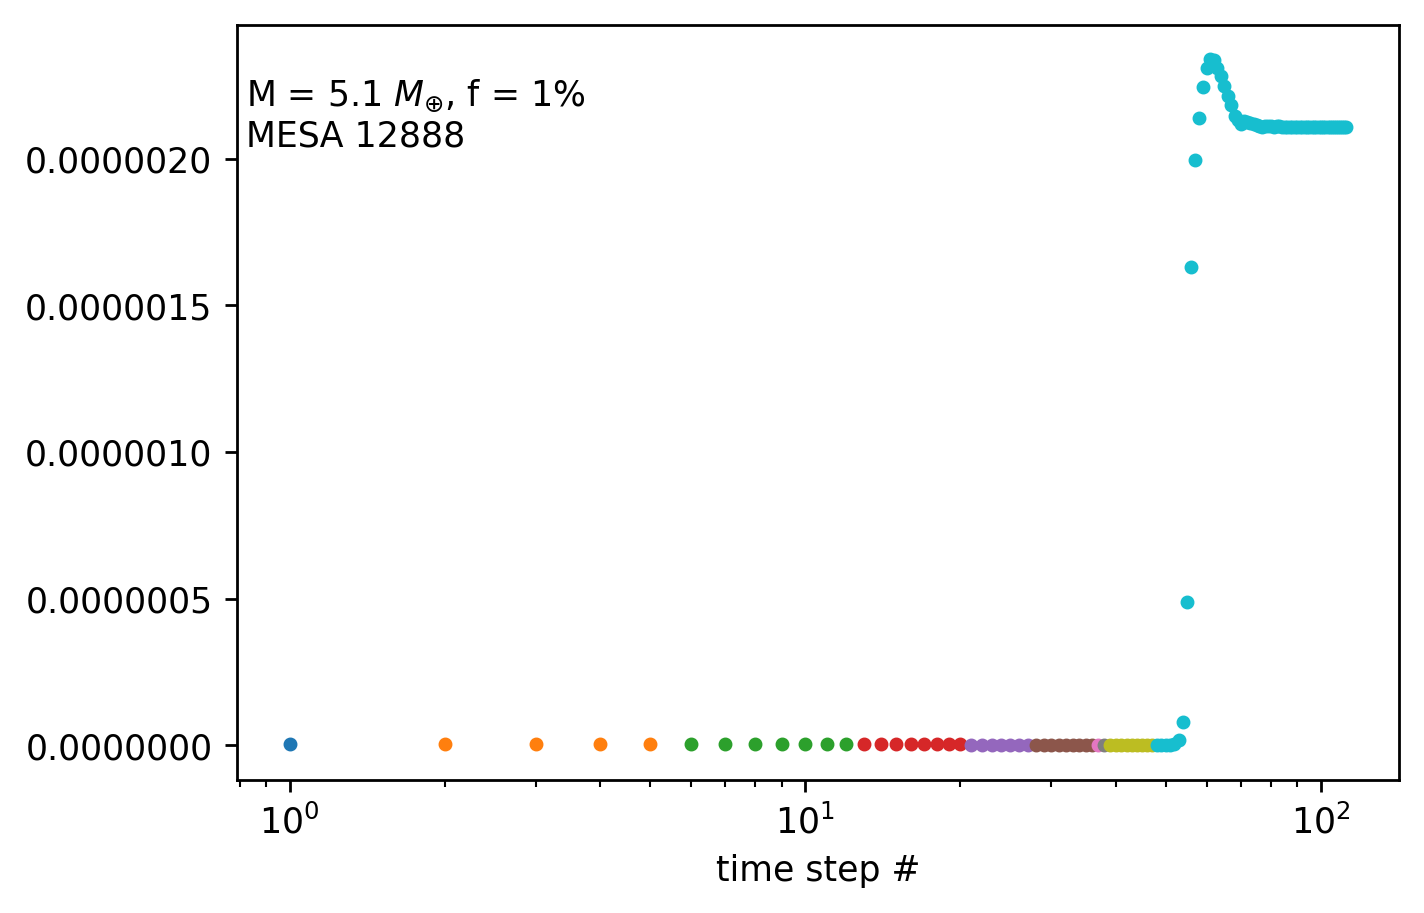

In [470]:
fig8 = plt.figure()
ax8 = plt.gca()
fig8.set_dpi(250)

xs = np.arange(len(pre_reduce2.grid_luminosities[0])) + 1
ax8.plot(xs,pre_reduce2.grid_luminosities[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,pre_core2.grid_luminosities[0],'.',label='pre_core')
xs = np.arange(len(comp2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,comp2.grid_luminosities[0],'.',label='comp')
xs = np.arange(len(corel2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,corel2.grid_luminosities[0],'.',label='corel')
xs = np.arange(len(reduce2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,reduce2.grid_luminosities[0],'.',label='reduce')
xs = np.arange(len(corem2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,corem2.grid_luminosities[0],'.',label='corem')
xs = np.arange(len(heating2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,heating2.grid_luminosities[0],'.',label='heating')
xs = np.arange(len(remove_heating2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,remove_heating2.grid_luminosities[0],'.',label='remove_heating')
xs = np.arange(len(irrad2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,irrad2.grid_luminosities[0],'.',label='irrad')
xs = xs = np.arange(len(evolve2.grid_luminosities[0])) + xs[-1] + 1
ax8.plot(xs,evolve2.grid_luminosities[0],'.',label='evolve')

ax8.set_xlabel('time step #')
#ax8.set_ylabel('planet radius (Earth luminosities)')

#ax8.set_xlim(0,500)
ax8.set_xscale('log')

ax8.text(0.05, 0.85, 'M = 5.1 $M_{\oplus}$, f = 1% \nMESA 12888', transform=ax1.transAxes)

In [620]:
pre_reduce3 = EarlyPlanet('pre_reduce3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='pre_reduce'

)

[[28.99999999]] [[11.92188467]] [[0.]] [[1000000.]] [[7.08236237e-10]]


In [521]:
pre_core3 = EarlyPlanet('pre_core3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='pre_core'

)

In [522]:
comp3 = EarlyPlanet('comp3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='comp'

)

In [523]:
corel3 = EarlyPlanet('corel3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='corel'

)

In [524]:
reduce3 = EarlyPlanet('reduce3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='reduce'

)

In [525]:
corem3 = EarlyPlanet('corem3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='corem'

)

In [526]:
heating3 = EarlyPlanet('heating3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='heating'

)

In [527]:
remove_heating3 = EarlyPlanet('remove_heating3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='remove_heating'

)

In [528]:
irrad3 = EarlyPlanet('irrad3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23],
                stage='irrad'

)

In [529]:
evolve3 = Planet('evolve3',
                5.77, 0.18, 
                2.04, 0.006, 
                'LOGS',
                mpList=[5.8], 
                fList=[0.01],
                orbitalList=[0.026],
                entropyList=[7.23]

)

Text(0.05, 0.85, 'M = 5.8 $M_{\\oplus}$, f = 1% \nMESA 12778')

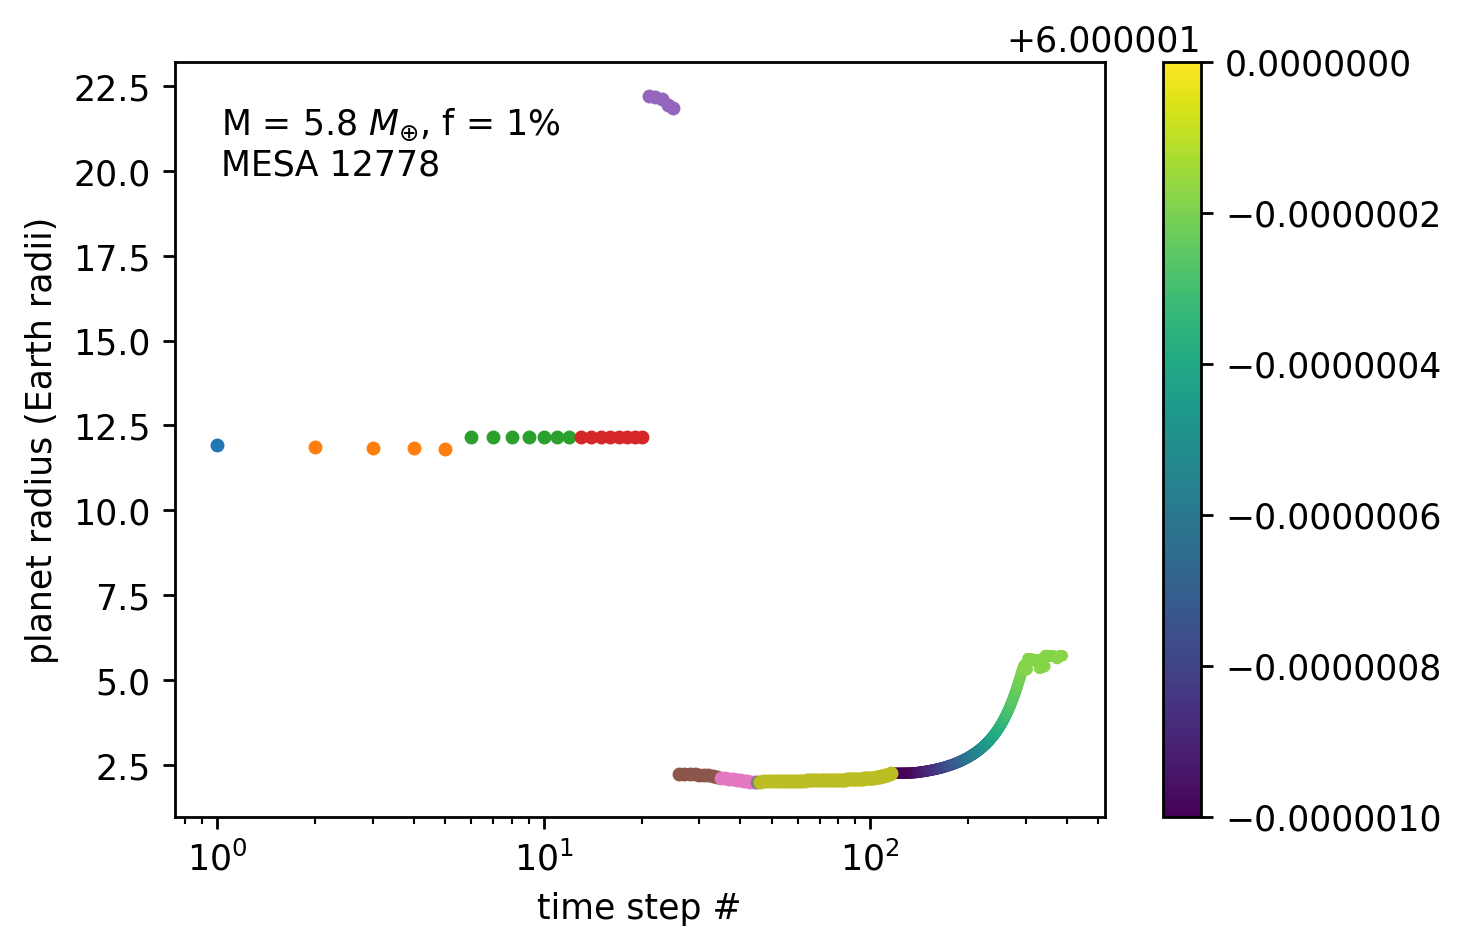

In [606]:
fig9 = plt.figure()
ax9 = plt.gca()
fig9.set_dpi(250)
xs = np.arange(len(pre_reduce3.grid_radii[0])) + 1
ax9.plot(xs,pre_reduce3.grid_radii[0],'.', label='pre_reduce')
xs = np.arange(len(pre_core3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,pre_core3.grid_radii[0],'.',label='pre_core')
xs = np.arange(len(comp3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,comp3.grid_radii[0],'.',label='comp')
xs = np.arange(len(corel3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,corel3.grid_radii[0],'.',label='corel')
xs = np.arange(len(reduce3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,reduce3.grid_radii[0],'.',label='reduce')
xs = np.arange(len(corem3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,corem3.grid_radii[0],'.',label='corem')
xs = np.arange(len(heating3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,heating3.grid_radii[0],'.',label='heating')
xs = np.arange(len(remove_heating3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,remove_heating3.grid_radii[0],'.',label='remove_heating')
xs = np.arange(len(irrad3.grid_radii[0])) + xs[-1] + 1
ax9.plot(xs,irrad3.grid_radii[0],'.',label='irrad')
xs = xs = np.arange(len(evolve3.grid_radii[0])) + xs[-1] + 1
#ax9.plot(xs,evolve3.grid_radii[0],'.',label='evolve')
plt.scatter(xs, evolve3.grid_radii[0],s=5,c=(evolve3.grid_ages[0]/1e6),vmin=6.0,vmax=6.0+1e-6)

plt.colorbar()

ax9.set_xlabel('time step #')
ax9.set_ylabel('planet radius (Earth radii)')

#ax9.set_xlim(0,500)
ax9.set_xscale('log')
#ax9.set_xlim(100,450)
#ax9.set_ylim(0,8)

ax9.text(0.05, 0.85, 'M = 5.8 $M_{\oplus}$, f = 1% \nMESA 12778', transform=ax9.transAxes)

In [595]:
c=(evolve3.grid_ages[0])
#print(list(np.diff(c)))

In [553]:
-2.11345874e-03/5.28362243e-04

-4.000018487316475

In [554]:
-3.73034936e-08/4

-9.3258734e-09

In [593]:
def get_early_stages(self):
    stages = ['pre_reduce', 'pre_core', 'comp', 'corel', 'reduce', 'corem', 'heating', 'remove_heating', 'irrad']
    
    planets = []
    for stage in stages:
        p = EarlyPlanet(str(stage),
                        self.mass, self.mass_unc,
                        self.radius, self.radius_unc,
                        self.datadir,
                        self.mpList,
                        self.fList,
                        self.orbitalList,
                        self.entropyList,
                        stage           
        )
        planets.append(p)
        
    return planets
        

In [609]:
be = get_early_stages(k2146b)

In [616]:
pre_reduce3.grid_radii

array([[11.92188467]])

In [602]:
x='grid_radii'
getattr(b_pre, x)

array([[2.17617709, 2.19501722, 2.20957234, ..., 2.19302432, 2.16489603,
        2.15062294],
       [2.20532958, 2.22547765, 2.23990003, ..., 2.25719427, 2.22604472,
        2.21460315],
       [2.27958528, 2.30057166, 2.3158538 , ..., 2.32981895, 2.29433012,
        2.28243409],
       ...,
       [2.85921283, 2.88761525, 2.89569363, ...,        nan,        nan,
               nan],
       [2.8953959 , 2.92157116, 2.92664389, ...,        nan,        nan,
               nan],
       [2.96037669, 2.98920146, 2.99639222, ...,        nan,        nan,
               nan]])

In [612]:
be[0].grid_radii

array([[12.03470906],
       [12.03649126],
       [12.04018346],
       [12.0440089 ],
       [12.04782984],
       [12.0527097 ],
       [12.05620304],
       [12.05949136],
       [12.06252521],
       [12.05514312],
       [12.06607111],
       [12.06408827],
       [12.06322281],
       [12.06008047],
       [12.05122665],
       [12.08977057]])

In [614]:
pwd

'/Users/bridgethaas/planets_grid'